In [328]:
import os
import re
import aocd
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from copy import deepcopy
from aocd import submit

#Part 1
data = aocd.get_data(day=10, year=2023).split('\n')

In [299]:
data = """FF7FSF7F7F7F7F7F---7
L|LJ||||||||||||F--J
FL-7LJLJ||||||LJL-77
F--JF--7||LJLJ7F7FJ-
L---JF-JLJ.||-FJLJJ7
|F|F-JF---7F7-L7L|7|
|FFJF7L7F-JF7|JL---7
7-L-JL7||F7|L7F-7F7|
L.L7LFJ|||||FJL7||LJ
L7JLJL-JLJLJL--JLJ.L""".split('\n')

In [329]:
data = [[x for x in y] for y in data]
data = np.array(data)
data = np.pad(data, constant_values='.', pad_width=1)
data

array([['.', '.', '.', ..., '.', '.', '.'],
       ['.', 'F', '.', ..., '7', '7', '.'],
       ['.', '|', '7', ..., 'L', 'J', '.'],
       ...,
       ['.', 'F', 'J', ..., '|', '|', '.'],
       ['.', 'F', 'L', ..., '-', '7', '.'],
       ['.', '.', '.', ..., '.', '.', '.']], dtype='<U1')

In [330]:
# Find start
si,sj = np.where(data == 'S')
si,sj = si[0],sj[0]
data[si-1:si+2,sj-1:sj+2]

array([['7', 'F', '7'],
       ['L', 'S', '|'],
       ['7', 'F', 'J']], dtype='<U1')

In [331]:
#Instead of following two paths, just follow one and see how far you get
#path = np.zeros_like(data)
right, left = (0,1), (0,-1)
up, down = (-1,0), (1,0)
top_left, top_right = (-1,-1), (-1,1)
bottom_left, bottom_right = (1,-1), (1,1)


def get_new_direction(direction, char):
    
    if (char == '|') or (char == '-'):
        return direction
    elif char == 'F':
        if direction == up: 
            return right
        else:
            return down
    elif char == 'L':
        if direction == down:
            return right
        else:
            return up
    elif char == '7':
        if direction == up: 
            return left
        else:
            return down
    elif char == 'J':
        if direction == down:
            return left
        else:
            return up
        
    wtf

    
def get_new_inside_direction(inside_direction, direction, next_direction):
    if direction == next_direction:
        return inside_direction, None
    if direction == up:
        if next_direction == right:
            if inside_direction == right:
                return down, None
            else:
                return up, top_left
        elif next_direction == left:
            if inside_direction == right:
                return up, top_right
            else:
                return down, None
    if direction == down:
        if next_direction == right:
            if inside_direction == right:
                return up, None
            else:
                return down, bottom_left
        elif next_direction == left:
            if inside_direction == right:
                return down, bottom_right
            else:
                return up, None
    if direction == left:
        if next_direction == up:
            if inside_direction == up:
                return right, None
            else:
                return left, bottom_left
        elif next_direction == down:
            if inside_direction == up:
                return left, top_left
            else:
                return right, None
    if direction == right:
        if next_direction == up:
            if inside_direction == up:
                return left, None
            else:
                return right, bottom_right
        elif next_direction == down:
            if inside_direction == up:
                return right, top_right
            else:
                return left, None
    

i,j = (si,sj)
steps = 0
path_map = np.zeros(data.shape)
path_map[si,sj] = 1
direction = down
inside_direction = left
inside_map = np.zeros(path_map.shape)

path = [(direction, si, sj, inside_direction)]
while (data[i,j] != 'S') or (steps == 0):
    next_i, next_j = i + direction[0], j + direction[1]
    next_char = data[next_i,next_j]
    next_direction = get_new_direction(direction, next_char)
    next_inside_direction, corner_inside = get_new_inside_direction(inside_direction, direction, next_direction)
    
    if corner_inside is not None:
        inside_map[i + corner_inside[0], j + corner_inside[1]] = 1
        
    path += [(next_direction, next_i, next_j, next_inside_direction)]
    path_map[next_i, next_j] = 1
    inside_map[next_i + next_inside_direction[0], next_j + next_inside_direction[1]] = 1
    
    direction, i, j, inside_direction = path[-1]
    
    steps += 1
    #if steps > 10:
    #    break

NameError: name 'wtf' is not defined

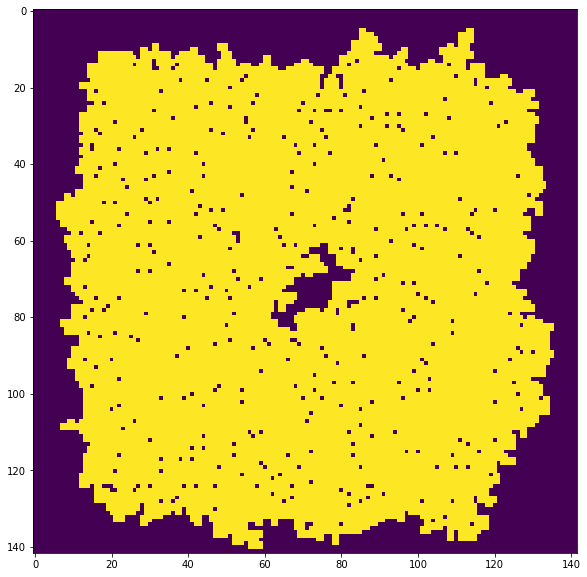

In [332]:
plt.figure(figsize=(10,10))
plt.imshow(path_map)

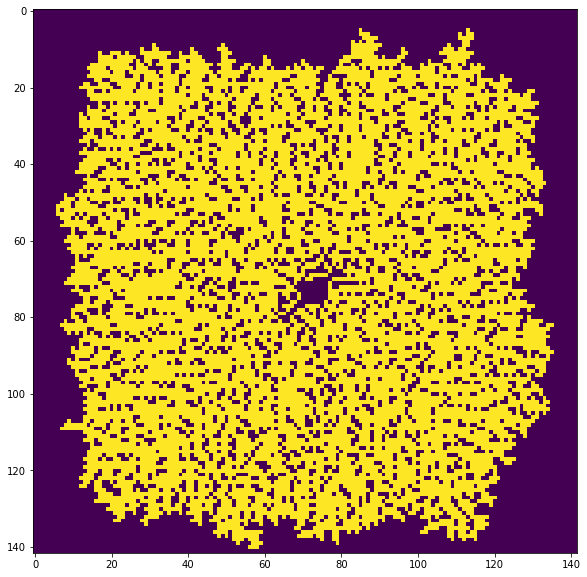

In [333]:
plt.figure(figsize=(10,10))
plt.imshow(inside_map)

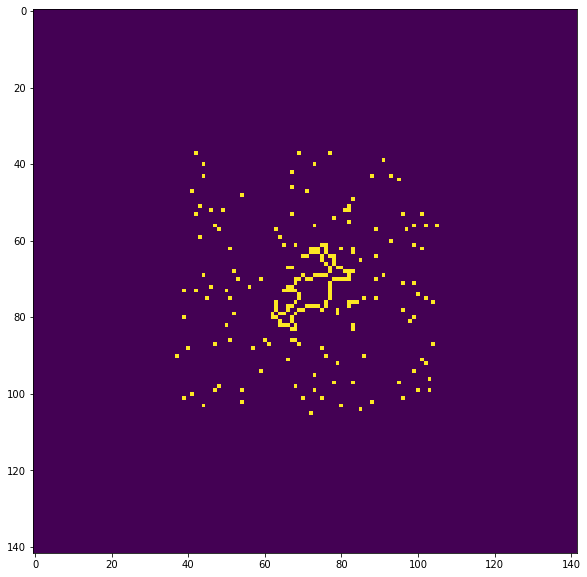

In [334]:
plt.figure(figsize=(10,10))
plt.imshow((inside_map > 0) & (path_map == 0))

In [335]:
import cv2
only_inside = (inside_map > 0) & (path_map == 0)
new_path_map = path_map.copy().astype('uint8')

for i,j in [(np.where(only_inside > 0)[1][i],np.where(only_inside > 0)[0][i]) for i in range(len(np.where(only_inside > 0)[0]))]:

    cv2.floodFill(new_path_map,None,(i,j),1)     # line 27
new_path_map

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

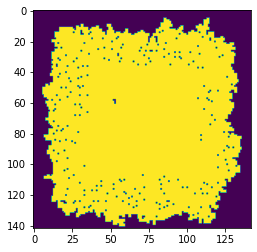

In [336]:
plt.imshow(new_path_map)

In [337]:
new_path_map.sum() - path_map.sum()

297.0